In [1]:
# train_features_comparison.ipynb

# Required installs (run once)
# !pip install feast xgboost scikit-learn codecarbon matplotlib pandas

import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from codecarbon import EmissionsTracker
import matplotlib.pyplot as plt
from feast import FeatureStore


In [2]:

# Initialize Feast feature store (adjust path if needed)
store = FeatureStore(repo_path=".")

# Load your entity dataframe (athlete_id + event_timestamp)
entity_df = pd.read_csv("../entity_df.csv", parse_dates=["event_timestamp"])

In [3]:
# Feature lists for v1 and v2 (exclude target if you have one)
features_v1 = [
    "athlete_features_v1:gender",
    "athlete_features_v1:age",
    "athlete_features_v1:height",
    "athlete_features_v1:weight",
    "athlete_features_v1:total_olympic_lift",
    "athlete_features_v1:total_powerlifting_lift",
    "athlete_features_v1:overall_total_lift",
]

features_v2 = [
    "athlete_features_v2:gender",
    "athlete_features_v2:age",
    "athlete_features_v2:height",
    "athlete_features_v2:weight",
    "athlete_features_v2:BMI",
    "athlete_features_v2:candj_to_weight_ratio",
    "athlete_features_v2:snatch_to_weight_ratio",
    "athlete_features_v2:deadlift_to_weight_ratio",
    "athlete_features_v2:backsq_to_weight_ratio",
    "athlete_features_v1:overall_total_lift",
]


In [4]:


# Target column — assuming you want to predict 'overall_total_lift' from v1 as target
target_col = "overall_total_lift"

# Helper function to preprocess features and target
def prepare_data(feature_df, target_col):
    # Drop entity and timestamp columns
    feature_df = feature_df.drop(columns=["event_timestamp", "athlete_id"])
    # Convert categorical to numeric if needed
    if "gender" in feature_df.columns:
        feature_df["gender"] = feature_df["gender"].map({"Male": 0, "Female": 1}).fillna(0)
    # Drop rows with missing target
    feature_df = feature_df.dropna(subset=[target_col])
    X = feature_df.drop(columns=[target_col])
    y = feature_df[target_col]
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:


# Get historical features from Feast for both versions
df_v1 = store.get_historical_features(entity_df=entity_df, features=features_v1).to_df()
df_v2 = store.get_historical_features(entity_df=entity_df, features=features_v2).to_df()

In [8]:


# Add target to df_v2 by joining with df_v1 target column on athlete_id and event_timestamp
df_v2 = df_v2.merge(
    df_v1[["athlete_id", "event_timestamp", target_col]],
    on=["athlete_id", "event_timestamp"],
    how="left",
)


[codecarbon WARNING @ 16:55:51] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 16:55:51] [setup] RAM Tracking...
[codecarbon INFO @ 16:55:51] [setup] CPU Tracking...


Training model on features v1 with param set 1


[codecarbon WARNING @ 16:55:53] We saw that you have a Intel(R) Core(TM) i7-14650HX but we don't know it. Please contact us.
[codecarbon WARNING @ 16:55:53] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 16:55:53] CPU Model on constant consumption mode: Intel(R) Core(TM) i7-14650HX
[codecarbon WARNING @ 16:55:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:55:53] [setup] GPU Tracking...
[codecarbon INFO @ 16:55:53] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 16:55:53] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 16:55:53] >>> Tracker's metadata:
[codecarbon INFO @ 16:55:53]   Platform system: Windows-11-10.0.26100-SP0
[codecarbon 

RMSE: 10.0497, Carbon Emissions: 0.0000 kg CO2
Training model on features v1 with param set 2


[codecarbon WARNING @ 16:55:55] We saw that you have a Intel(R) Core(TM) i7-14650HX but we don't know it. Please contact us.
[codecarbon WARNING @ 16:55:55] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 16:55:55] CPU Model on constant consumption mode: Intel(R) Core(TM) i7-14650HX
[codecarbon WARNING @ 16:55:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:55:55] [setup] GPU Tracking...
[codecarbon INFO @ 16:55:55] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 16:55:55] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 16:55:55] >>> Tracker's metadata:
[codecarbon INFO @ 16:55:55]   Platform system: Windows-11-10.0.26100-SP0
[codecarbon 

RMSE: 7.6508, Carbon Emissions: 0.0000 kg CO2
Training model on features v2 with param set 1


[codecarbon WARNING @ 16:55:57] We saw that you have a Intel(R) Core(TM) i7-14650HX but we don't know it. Please contact us.
[codecarbon WARNING @ 16:55:57] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 16:55:57] CPU Model on constant consumption mode: Intel(R) Core(TM) i7-14650HX
[codecarbon WARNING @ 16:55:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:55:57] [setup] GPU Tracking...
[codecarbon INFO @ 16:55:57] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 16:55:57] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 16:55:57] >>> Tracker's metadata:
[codecarbon INFO @ 16:55:57]   Platform system: Windows-11-10.0.26100-SP0
[codecarbon 

RMSE: 25.6650, Carbon Emissions: 0.0000 kg CO2
Training model on features v2 with param set 2


[codecarbon WARNING @ 16:55:59] We saw that you have a Intel(R) Core(TM) i7-14650HX but we don't know it. Please contact us.
[codecarbon WARNING @ 16:55:59] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 16:55:59] CPU Model on constant consumption mode: Intel(R) Core(TM) i7-14650HX
[codecarbon WARNING @ 16:55:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:55:59] [setup] GPU Tracking...
[codecarbon INFO @ 16:55:59] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 16:55:59] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: pynvml
            
[codecarbon INFO @ 16:55:59] >>> Tracker's metadata:
[codecarbon INFO @ 16:55:59]   Platform system: Windows-11-10.0.26100-SP0
[codecarbon 

RMSE: 16.5578, Carbon Emissions: 0.0000 kg CO2


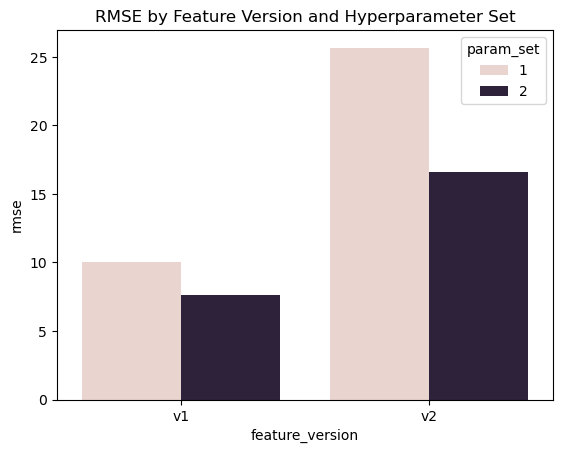

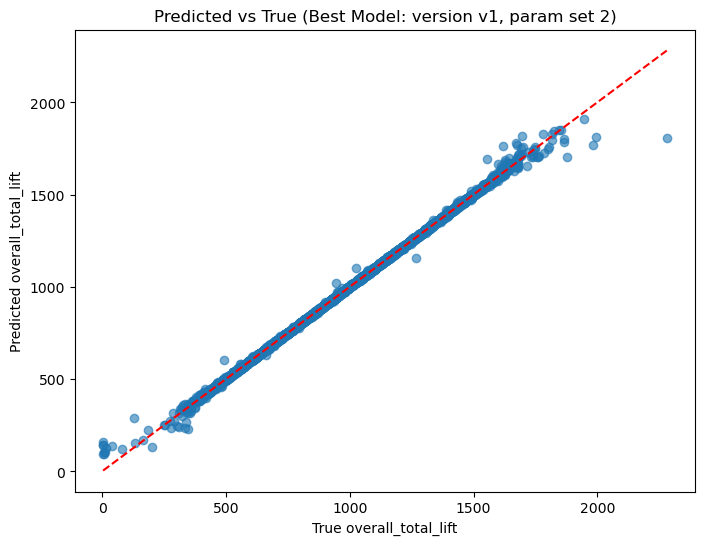

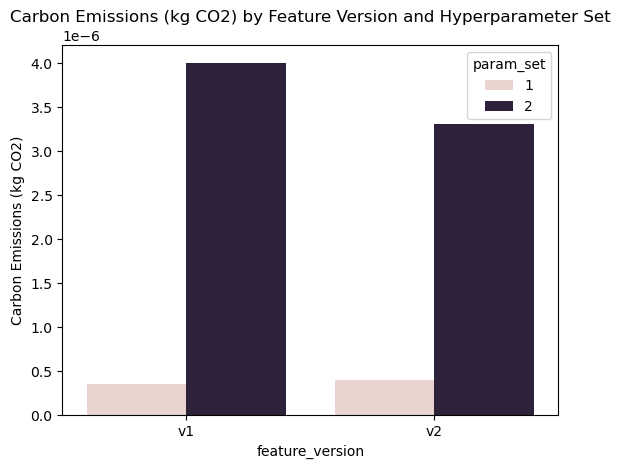

CodeCarbon Emissions Summary:
                                   mean  std           min           max
feature_version param_set                                               
v1              1          3.530388e-07  NaN  3.530388e-07  3.530388e-07
                2          4.006825e-06  NaN  4.006825e-06  4.006825e-06
v2              1          3.882836e-07  NaN  3.882836e-07  3.882836e-07
                2          3.303395e-06  NaN  3.303395e-06  3.303395e-06


In [12]:
# train_features_comparison.ipynb

# Required installs (run once)
# !pip install feast xgboost scikit-learn codecarbon matplotlib pandas

import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from codecarbon import EmissionsTracker
import matplotlib.pyplot as plt
from feast import FeatureStore
import numpy as np

# Prepare train/test splits
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = prepare_data(df_v1, target_col)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = prepare_data(df_v2, target_col)

# Define 2 sets of hyperparameters
param_sets = [
    {"objective": "reg:squarederror", "max_depth": 3, "learning_rate": 0.1, "n_estimators": 100, "random_state": 42},
    {"objective": "reg:squarederror", "max_depth": 6, "learning_rate": 0.05, "n_estimators": 200, "random_state": 42},
]

# Storage for results
results = []

# Run experiments: 2 feature versions × 2 param sets
for version_name, (X_train, X_test, y_train, y_test) in [
    ("v1", (X_train_v1, X_test_v1, y_train_v1, y_test_v1)),
    ("v2", (X_train_v2, X_test_v2, y_train_v2, y_test_v2)),
]:
    for i, params in enumerate(param_sets, 1):
        print(f"Training model on features {version_name} with param set {i}")
        tracker = EmissionsTracker()
        tracker.start()

        model = xgb.XGBRegressor(**params)
        model.fit(X_train, y_train)

        emissions = tracker.stop()

        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))

        results.append({
            "feature_version": version_name,
            "param_set": i,
            "rmse": rmse,
            "carbon_kg": emissions,
            "model": model,
            "y_test": y_test,
            "y_pred": preds,
        })

        print(f"RMSE: {rmse:.4f}, Carbon Emissions: {emissions:.4f} kg CO2")

# Plot RMSE comparison
import seaborn as sns
sns.barplot(data=pd.DataFrame(results), x="feature_version", y="rmse", hue="param_set")
plt.title("RMSE by Feature Version and Hyperparameter Set")
plt.show()

# Plot predicted vs true for best model (lowest RMSE)
best_result = min(results, key=lambda r: r["rmse"])
plt.figure(figsize=(8,6))
plt.scatter(best_result["y_test"], best_result["y_pred"], alpha=0.6)
plt.xlabel("True overall_total_lift")
plt.ylabel("Predicted overall_total_lift")
plt.title(f"Predicted vs True (Best Model: version {best_result['feature_version']}, param set {best_result['param_set']})")
plt.plot([best_result["y_test"].min(), best_result["y_test"].max()], [best_result["y_test"].min(), best_result["y_test"].max()], 'r--')
plt.show()

# Plot carbon emissions comparison
emissions_df = pd.DataFrame(results)
sns.barplot(data=emissions_df, x="feature_version", y="carbon_kg", hue="param_set")
plt.title("Carbon Emissions (kg CO2) by Feature Version and Hyperparameter Set")
plt.ylabel("Carbon Emissions (kg CO2)")
plt.show()

# Show summary statistics for carbon emissions
summary = emissions_df.groupby(["feature_version", "param_set"])["carbon_kg"].agg(["mean", "std", "min", "max"])
print("CodeCarbon Emissions Summary:")
print(summary)
